In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# inline - to see diagrams in notebook
# diagrams seen here are only for pandas module, more advanced ones are in matplotlib tutorials

In [2]:
bar = pd.read_csv("./weather_barcelona.csv", index_col='Date')
ams = pd.read_csv("./weather_amsterdam.csv", index_col='Date')
rom = pd.read_csv("./weather_rome.csv", index_col='Date')

In [3]:
temp_max = pd.DataFrame(index=bar.index)
temp_max['Barcelona'] = bar['TempMax']
temp_max['Amsterdam'] = ams['TempMax']
temp_max['Rome'] = rom['TempMax']

In [4]:
temp_max.head()

,Barcelona,Amsterdam,Rome
Date,,,
2018-01-01,17,8,14
2018-01-02,19,9,13
2018-01-03,23,11,14
2018-01-04,24,11,16
2018-01-05,20,8,17


In [5]:
def GradeDay(row):
    if row['TempMax'] >= row['AvgTempMax']:
        return 'PLUS'
    else:
        return 'MINUS'

In [6]:
rom['GradeDay'] = rom.apply(GradeDay, axis=1)
bar['GradeDay'] = bar.apply(GradeDay, axis=1)
ams['GradeDay'] = ams.apply(GradeDay, axis=1)

In [7]:
rom.head()

,TempMax,TempMin,Rain,AvgTempMax,AvgTempMin,GradeDay
Date,,,,,,
2018-01-01,14,8,0,12,4,PLUS
2018-01-02,13,7,0,12,4,PLUS
2018-01-03,14,1,0,12,4,PLUS
2018-01-04,16,6,0,12,4,PLUS
2018-01-05,17,7,0,12,3,PLUS


In [8]:
rom['GradeDay'].value_counts()

PLUS     70
MINUS    20
Name: GradeDay, dtype: int64

In [9]:
cities3 = pd.DataFrame(index=['MINUS','PLUS'])

In [11]:
cities3['Barcelona'] = bar['GradeDay'].value_counts()
cities3['Amsterdam'] = ams['GradeDay'].value_counts()
cities3['Rome'] = rom['GradeDay'].value_counts()

In [12]:
cities3

,Barcelona,Amsterdam,Rome
MINUS,26,22,20
PLUS,64,68,70


<AxesSubplot:ylabel='Barcelona'>

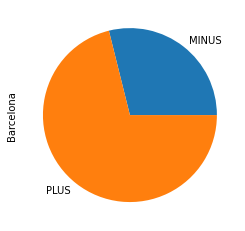

In [13]:
cities3['Barcelona'].plot(kind='pie')

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Amsterdam'>,
       <AxesSubplot:ylabel='Rome'>], dtype=object)

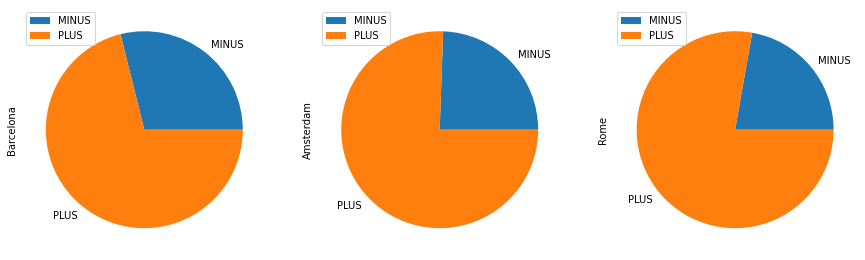

In [16]:
cities3.plot(kind='pie',figsize=(15,5), subplots=True)

array([<AxesSubplot:ylabel='Barcelona'>, <AxesSubplot:ylabel='Amsterdam'>,
       <AxesSubplot:ylabel='Rome'>], dtype=object)

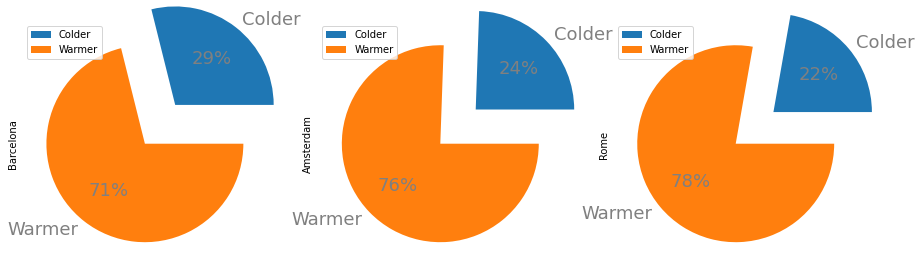

In [21]:
cities3.plot(kind='pie',figsize=(15,5), subplots=True, labels=['Colder','Warmer'],
            autopct='%.0f%%', fontsize=18, textprops=dict(color='gray'), explode=(0.5,0))